## 15.5 Homework
Write a code to solve the minimum of 2D function with Monte Carlo method.

Write a code to solve the minimum of 2D function using the gradient decent method with variable step size by following the wikipedia page.

/Users/daisy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


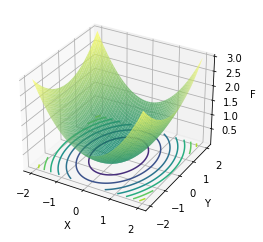

In [53]:
#Import relevant libraries.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


x_min, x_max = -2, 2                        
y_min, y_max = -2, 2                        

#Define first function.
def F1(x, y):
    return 1/2 *x**2 + 1/4 *y**2

Nx = np.linspace(x_min, x_max, 100)
Ny = np.linspace(y_min, y_max, 100)

x, y = np.meshgrid(Nx, Ny)

z = F1(x, y)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z, cmap = 'summer', alpha = 0.8)
cset = ax.contour(x,y,z, zdir='z', offset = 0)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('F')

plt.show()

### Write a code to solve the minimum of 2D function with Monte Carlo method.

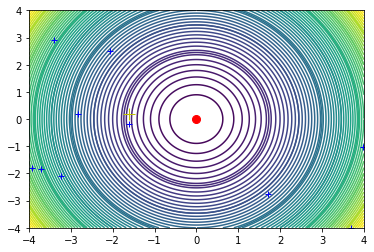

Minimum from Monte Carlo:  -1.604730729509054 , 0.17416304104629976
Number of iterations:  10


In [54]:
x_min, x_max = -4, 4    
y_min, y_max = -4, 4                          

nx = np.linspace(x_min, x_max, 100)
ny = np.linspace(y_min, y_max, 100)

def init(x_min, x_max, y_min, y_max):
    x0 = x_min + np.random.random() * (x_max - x_min)
    y0 = y_min + np.random.random() * (y_max - y_min)
    return [x0, y0]

def Monte_Carlo(N):
    
    x_min, x_max = -4, 4
    y_min, y_max = -4, 4
    x_position = []
    y_position = []
    for i in range(N):
        x_position.append(x_min + np.random.random() * (x_max-x_min))
        y_position.append(y_min + np.random.random() * (x_max-x_min))
    
    return x_position, y_position

def find_close(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

n_x = np.linspace(x_min,x_max, 400)
n_y = np.linspace(y_min,y_max, 400)

x,y = np.meshgrid(n_x,n_y)
z = F1(x, y)
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.2)
plt.contour(x,y,z, levels=levels)
plt.contour(x,y,z)

#Monte Carlo method using 10 random coordinate generations.
N = 10
mc_x, mc_y = Monte_Carlo(N)
mc_xmin, mc_ymin = find_close(mc_x, 0), find_close(mc_y, 0)
x0, y0 = init(x_min, x_max, y_min, y_max)

plt.plot(mc_x, mc_y, 'b+')
plt.plot(mc_xmin, mc_ymin, 'y+', markersize=12 )
plt.plot(0, 0, 'ro', markersize=8)
plt.show()

print('Minimum from Monte Carlo: ', mc_xmin, ',', mc_ymin)
print('Number of iterations: ', N)

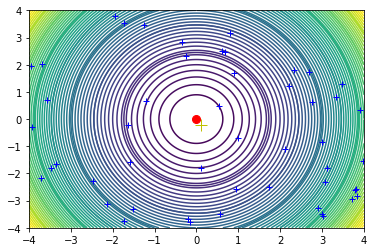

Minimum from Monte Carlo:  0.11102310699850992 , -0.21377017093971418
Number of iterations:  50


In [55]:
#Monte Carlo method using 50 random coordinate generations.

nx = np.linspace(x_min,x_max, 400)
ny = np.linspace(y_min,y_max, 400)

x, y = np.meshgrid(nx,ny)
z = F1(x,y)
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.2)
plt.contour(x,y,z, levels=levels)
plt.contour(x,y,z)

N = 50
mc_x, mc_y = Monte_Carlo(N)
mc_xmin, mc_ymin = find_close(mc_x, 0), find_close(mc_y, 0)
x0, y0 = init(x_min, x_max, y_min, y_max)

plt.plot(mc_x, mc_y, 'b+')
plt.plot(mc_xmin, mc_ymin, 'y+', markersize=12 )
plt.plot(0, 0, 'ro', markersize=8)
plt.show()

print('Minimum from Monte Carlo: ', mc_xmin, ',', mc_ymin)
print('Number of iterations: ', N)

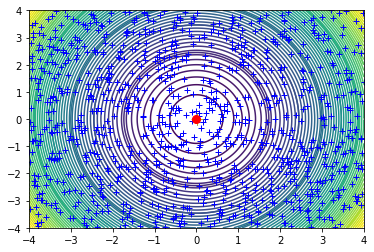

Minimum from Monte Carlo:  0.009390844884057614 , -0.00325338878213266
Number of iterations:  1000


In [56]:
#Monte Carlo method using 1000 random coordinate generations.

nx = np.linspace(x_min,x_max,400)
ny = np.linspace(y_min,y_max,400)

x,y = np.meshgrid(nx,ny)
z = F1(x,y)
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.2)
plt.contour(x,y,z, levels=levels)
plt.contour(x,y,z)


N = 1000
mc_x, mc_y = Monte_Carlo(N)
mc_xmin, mc_ymin = find_close(mc_x, 0), find_close(mc_y, 0)
x0, y0 = init(x_min, x_max, y_min, y_max)

plt.plot(mc_x, mc_y, 'b+')
plt.plot(mc_xmin, mc_ymin, 'y+', markersize=12 )
plt.plot(0, 0, 'ro', markersize=8)
plt.show()

print('Minimum from Monte Carlo: ', mc_xmin, ',', mc_ymin)
print('Number of iterations: ', N)

### The code below solves the minimum of the 2D function using the gradient decent method with variable step size.


In [57]:
x_i = 1
y_i = 2
dx = 0.01
precision = 0.00001
prev_step_size = 1 
max_iters = 10000
i = 0 

dfx = lambda x: x
dfy = lambda y : y/2

while prev_step_size > precision and i < 10000:
    prev_x = x_i
    prev_y = y_i
    x_i -= dx * dfx(prev_x)
    y_i -= dx * dfy(prev_y)
    prev_step_size = abs(x_i - prev_x)
    max_iters += 1

print("Minimum of", F1(x_i,y_i), 'at x , y =', x_i,',',y_i)

Minimum of 0.001000956115016853 at x , y = 0.000983216317961648 , 0.06326050135283152
